# TDT football dataset sizes

Football matches are popular choices for TDT evaluations for various reasons.
This visualization shows the dataset sizes, which shows two things:

1. The datasets are normally very large, indicating popular events, as observed in some literature
2. In spite of this, all approaches struggle with non-key topics

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import pandas as pd
import os
import sys

sys.path.append(os.path.expanduser("~/GitHub/multiplex-plot"))
sys.path = list(set(sys.path))
from multiplex.drawable import Drawable

data = os.path.join(os.getcwd(), '../data/dataset-statistics.csv')
with open(data) as f:
    df = pd.read_csv(f)
df.columns = [ 'sizes', 'reference', 'year', 'citation' ]
# df['citation'] = df.reference + ' (' + df.year.astype('str') + ')'
df = df.sort_values(by=[ 'year', 'reference' ])
df['citation'] = df['citation'].fillna(df.reference + "(" + df.year.astype('str') + ")")
df.head()

,sizes,reference,year,citation
18,617950,Hsieh et al.,2012,Hsieh et al.(2012)
1,72335,Nichols et al.,2012,Nichols et al.(2012)
2,77517,Nichols et al.,2012,Nichols et al.(2012)
5,113189,Nichols et al.,2012,Nichols et al.(2012)
7,126971,Meladianos et al.,2015,Meladianos et al.(2015)


In [2]:
print(f"Mean dataset size: { round(df.sizes.mean()) }")
print(f"Median dataset size: { df.sizes.median() }")

Mean dataset size: 388911
Median dataset size: 237855.5


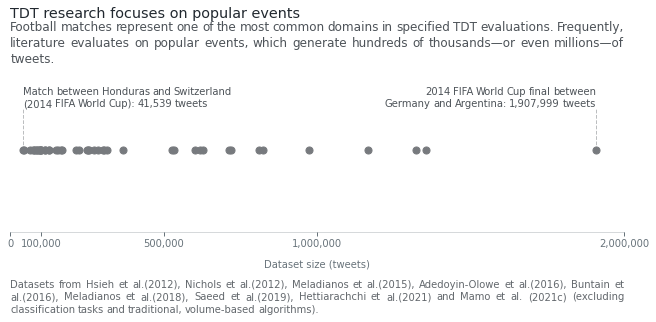

In [3]:
# set the style
plt.style.use(os.path.join(os.getcwd(), '..', 'modern-custom.style'))
plt.style.reload_library()
style = { 'color': 'C3', 's': 50 }
annotation_style = { 'fontsize': 'smaller', 'alpha': 0.8, 'va': 'top' }
line_style = { 'alpha': 0.3, 'linestyle': '--', 'linewidth': 1, 'zorder': -1 }

# create the visualization and set its layout
viz = Drawable(plt.figure(figsize=(11, 3)))
viz.scatter(df.sizes, [ 0 ] * len(df), **style)

# finalize the visualization
viz.set_xlim(0, 2e6)
ticks = [ 0, int(1e5), int(5e5), int(1e6), int(2e6) ]
viz.set_xticks(ticks)
viz.set_xticklabels([ f"{ format(tick, ',d') }" for tick in ticks ])
viz.set_xlabel('Dataset size (tweets)')
viz.get_yaxis().set_visible(False)
viz.set_ylim(-0.5, 0.5)

# add annotations
viz.annotate(f"Match between Honduras and Switzerland (2014 FIFA World Cup): { format(df.sizes.min(), ',d') } tweets",
             (df.sizes.min(), int(8e5)), 0.4, **annotation_style)
viz.axvline(df.sizes.min(), ymin=0.5, ymax=0.75, **line_style)

viz.annotate(f"2014 FIFA World Cup final between Germany and Argentina: { format(df.sizes.max(), ',d') } tweets",
             (int(12e5), df.sizes.max()), 0.4, align='right', **annotation_style)
viz.axvline(df.sizes.max(), ymin=0.5, ymax=0.75, **line_style)

# add the title and caption
citations = df.citation.unique()
viz.set_title('TDT research focuses on popular events', loc='left')
viz.set_caption(f"""Football matches represent one of the most common domains in specified TDT evaluations.
                    Frequently, literature evaluates on popular events, which generate hundreds of thousands—or even millions—of tweets.""",
                align='justify')
viz.set_footnote(f"""Datasets from { ', '.join(citations[:-1]) } and { citations[-1] }
                     (excluding classification tasks and traditional, volume-based algorithms).""", align='justify', alpha=0.7)
viz.savefig('../exports/2.2-all-datasets.png', dpi=300, bbox_inches='tight')

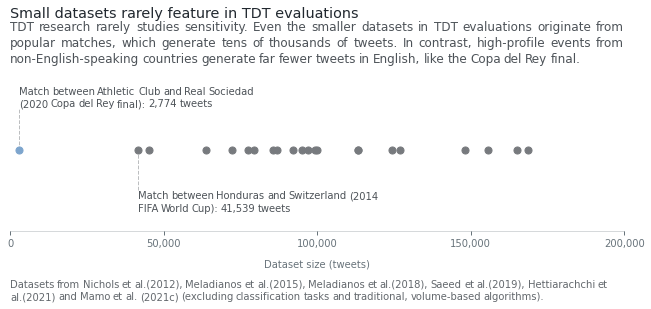

In [4]:
# prepare the data
_lim = 2e5
_df = df[df.sizes < _lim]
contrast = 2774

# create a style for the annotations and the contrasting point
style['color'] = 'C3'
contrast_style = dict(style)
contrast_style.update({ 'color': 'C1', 'edgecolor': 'C1' })

if 'va' in annotation_style:
    del annotation_style['va']

# create the visualization and set its layout
viz = Drawable(plt.figure(figsize=(11, 3)))
viz.scatter(_df.sizes, [ 0 ] * len(_df), **style)
viz.scatter(contrast, 0, **contrast_style)

# finalize the visualization
viz.set_xlim(0, _lim)
ticks = list(range(0, int(2.5e5), int(5e4)))
viz.set_xticks(ticks)
viz.set_xticklabels([ f"{ format(tick, ',d') }" for tick in ticks ])
viz.set_xlabel('Dataset size (tweets)')
viz.get_yaxis().set_visible(False)
viz.set_ylim(-0.5, 0.5)

# add annotations
viz.annotate(f"Match between Honduras and Switzerland (2014 FIFA World Cup): { format(df.sizes.min(), ',d') } tweets",
             (_df.sizes.min(), 120000), -0.4, va='bottom', **annotation_style)
viz.axvline(_df.sizes.min(), ymin=0.25, ymax=0.5, **line_style)
viz.annotate(f"Match between Athletic Club and Real Sociedad (2020 Copa del Rey final): { format(contrast, ',d') } tweets",
             (contrast, 85000), 0.4, va='top', **annotation_style)
viz.axvline(contrast, ymin=0.5, ymax=0.75, **line_style)

# add the title and caption
citations = _df.citation.unique()
viz.set_title('Small datasets rarely feature in TDT evaluations', loc='left')
viz.set_caption(f"""TDT research rarely studies sensitivity.
                    Even the smaller datasets in TDT evaluations originate from popular matches, which generate tens of thousands of tweets.
                    In contrast, high-profile events from non-English-speaking countries generate far fewer tweets in English, like the Copa del Rey final.""",
                align='justify')
viz.set_footnote(f"""Datasets from { ', '.join(citations[:-1]) } and { citations[-1] }
                     (excluding classification tasks and traditional, volume-based algorithms).""", alpha=0.7)
viz.savefig('../exports/2.2-small-datasets.png', dpi=300, bbox_inches='tight')